##  Лига Чемпионов 2022-2023

### Задача проекта
По предложенным датасетам, которые содержат статистику игроков Лиги Чемпионов, найти слабые места команд и выявить лучших игроков в рзных номинациях.<br>

Лига Чемпионов - это ежегодный футбольный турнир, в котором встречаются лучшие команды со всего мира.

### Этапы проекта

- [Голкиперы](#goalkeepers)
- [Защитные действия](#defensive)
- [Обостряющие действия](#shot)
- [Вывод](#conclusion)

Мы провели исследования каждого из вышеперечисленных наборов данных, включающие предобработку данных и исследовательский анализ.

### Голкиперы
<a id='goalkeepers'></a>

**Импортируем нужные библиотеки**

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

**Загрузим первый датасет, посвященный голкиперам**

In [2]:
advanced_goalkeeping = pd.read_csv('ucl advanced goalkeeping.csv')
advanced_goalkeeping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Player       50 non-null     object
 1   Nationality  50 non-null     object
 2   Position     50 non-null     object
 3   Club         50 non-null     object
 4   Age          50 non-null     object
 5   Born         50 non-null     object
 6   90s          50 non-null     object
 7   GA           50 non-null     object
 8   PKA          50 non-null     object
 9   FK           50 non-null     object
 10  CK           50 non-null     object
 11  OG           50 non-null     object
 12  PSxG         50 non-null     object
 13  PSxG/SoT     50 non-null     object
 14  PSxG+/-      50 non-null     object
 15  /90          50 non-null     object
 16  Cmp          50 non-null     object
 17  Att          50 non-null     object
 18  Cmp%         50 non-null     object
 19  Att.1        50 non-null     ob

В этом датасете проблема с типами данных: все *object*. Изменим их, но сначала посмотрим, какие голкиперы представлены в датасете

In [3]:
advanced_goalkeeping['Player'].unique()

array(['Antonio Adán', 'Alisson', 'Kepa Arrizabalaga', 'Janis Blaswich',
       'Yassine Bounou', 'Josh Cohen', 'Diogo Costa', 'Thibaut Courtois',
       'Marko Dmitrović', 'Gianluigi Donnarumma', 'Ederson',
       'Fraser Forster', 'Kamil Grabara', 'Ivo Grbić', 'Péter Gulácsi',
       'Joe Hart', 'Lukáš Hrádecký', 'Franco Israel', 'Gregor Kobel',
       'Philipp Köhn', 'Dominik Livaković', 'Hugo Lloris', 'Pau López',
       'Andriy Lunin', 'Mike Maignan', 'Player', 'Allan McGregor',
       'Jon McLaughlin', 'Edouard Mendy', 'Alex Meret', 'Alexander Meyer',
       'Simon Mignolet', 'Manuel Neuer', 'Jan Oblak', 'André Onana',
       'Stefan Ortega', 'Remko Pasveer', 'Iñaki Peña', 'Mattia Perin',
       'Mathew Ryan', 'Yann Sommer', 'Jindřich Staněk',
       'Wojciech Szczęsny', 'Ciprian Tătărușanu', 'Marc-André ter Stegen',
       'Kevin Trapp', 'Anatolii Trubin', 'Marián Tvrdoň', 'Sven Ulreich',
       'Odisseas Vlachodimos'], dtype=object)

Видим, что есть игрок *Player*. Очевидно, что нужно исключить эту строку из данных

In [4]:
advanced_goalkeeping = advanced_goalkeeping[advanced_goalkeeping['Player']!='Player']

**Изменим тип данных**

In [5]:
cols_to_numeric = advanced_goalkeeping.columns[4:]
advanced_goalkeeping[cols_to_numeric] = advanced_goalkeeping[cols_to_numeric].apply(pd.to_numeric)
advanced_goalkeeping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 49
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       49 non-null     object 
 1   Nationality  49 non-null     object 
 2   Position     49 non-null     object 
 3   Club         49 non-null     object 
 4   Age          49 non-null     int64  
 5   Born         49 non-null     int64  
 6   90s          49 non-null     float64
 7   GA           49 non-null     int64  
 8   PKA          49 non-null     int64  
 9   FK           49 non-null     int64  
 10  CK           49 non-null     int64  
 11  OG           49 non-null     int64  
 12  PSxG         49 non-null     float64
 13  PSxG/SoT     49 non-null     float64
 14  PSxG+/-      49 non-null     float64
 15  /90          49 non-null     float64
 16  Cmp          49 non-null     int64  
 17  Att          49 non-null     int64  
 18  Cmp%         49 non-null     float64
 19  Att.1     

Теперь с типами данных все хорошо, перейдем ко второму датасету

**Загрузим второй датасет**

In [6]:
goalkeeper = pd.read_csv('ucl goalkeeper.csv')
goalkeeper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       49 non-null     object 
 1   Nationality  49 non-null     object 
 2   Position     49 non-null     object 
 3   Club         49 non-null     object 
 4   Age          49 non-null     int64  
 5   Born         49 non-null     int64  
 6   MP           49 non-null     int64  
 7   Starts       49 non-null     int64  
 8   Min          49 non-null     object 
 9   90s          49 non-null     float64
 10  GA           49 non-null     int64  
 11  GA90         49 non-null     float64
 12  SoTA         49 non-null     int64  
 13  Saves        49 non-null     int64  
 14  Save%        49 non-null     float64
 15  W            49 non-null     int64  
 16  D            49 non-null     int64  
 17  L            49 non-null     int64  
 18  CS           49 non-null     int64  
 19  CS%       

Здесь проблем нет. Выясним, содержат ли датасеты информацию об одних и тех же голкиперах

In [7]:
print('Всего разных голкиперов в двух датасетах:', len(set(advanced_goalkeeping['Player']) | set(goalkeeper['Player'])))

Всего разных голкиперов в двух датасетах: 49


Значит, что в данных информация про одних и тех же голкиперов. Можем объединить датасеты в один для удобства

**Объединим датасеты**

In [8]:
same_columns = list(set(advanced_goalkeeping.columns) & set(goalkeeper.columns)) #общие датасеты
result_goalkeepers = pd.merge(advanced_goalkeeping, goalkeeper, on=same_columns, how='inner')

In [9]:
result_goalkeepers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       49 non-null     object 
 1   Nationality  49 non-null     object 
 2   Position     49 non-null     object 
 3   Club         49 non-null     object 
 4   Age          49 non-null     int64  
 5   Born         49 non-null     int64  
 6   90s          49 non-null     float64
 7   GA           49 non-null     int64  
 8   PKA          49 non-null     int64  
 9   FK           49 non-null     int64  
 10  CK           49 non-null     int64  
 11  OG           49 non-null     int64  
 12  PSxG         49 non-null     float64
 13  PSxG/SoT     49 non-null     float64
 14  PSxG+/-      49 non-null     float64
 15  /90          49 non-null     float64
 16  Cmp          49 non-null     int64  
 17  Att          49 non-null     int64  
 18  Cmp%         49 non-null     float64
 19  Att.1     

Данные готовы к исследованию

**Посчитаем среднее количество матчей для голкипера**

In [10]:
print('Среднее количество матчей на одного голкипера:' , result_goalkeepers['MP'].mean())

Среднее количество матчей на одного голкипера: 5.163265306122449


**Посмотрим на количество сыгранных матчей**

Напишем функцию для построения столбчатой диаграммы

In [11]:
def bar_plot(y, title):
    plt.figure(figsize=(10,5))
    sns.barplot(data=result_goalkeepers.sort_values(y, ascending=False).head(10), x='Player', y=y)
    plt.title(title)
    plt.xlabel('Голкиперы')
    plt.xticks(rotation=15, fontsize=8)
    plt.show()

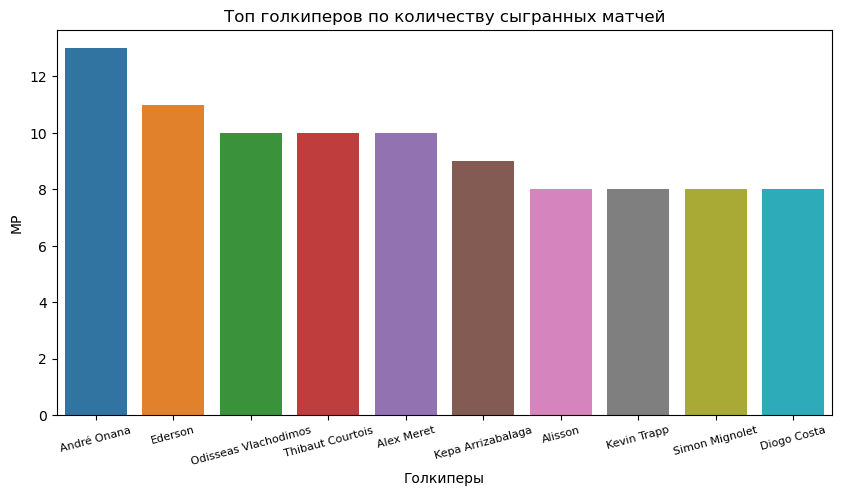

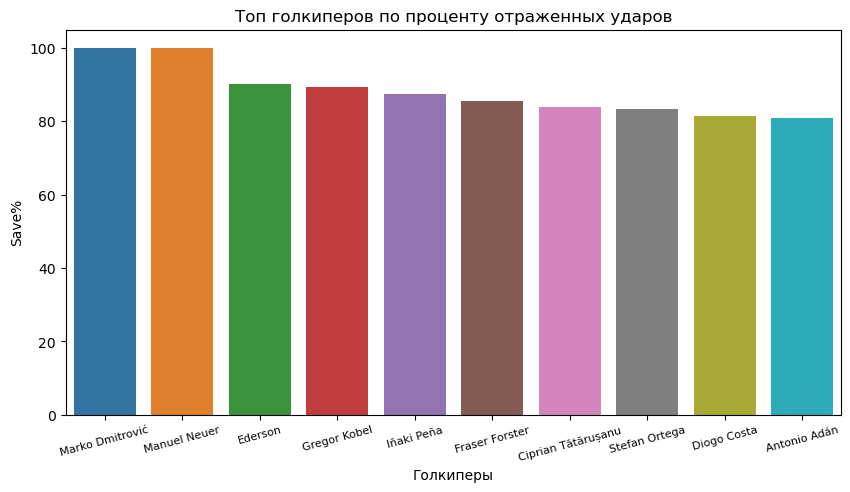

In [12]:
bar_plot('MP', 'Топ голкиперов по количеству сыгранных матчей')
bar_plot('Save%', 'Топ голкиперов по проценту отраженных ударов')

**Выводы**
- *Andre Onana* рекордсмен по количеству сыгранных матчей в Лиге Чемпионов 2022-2023
- *Dmitrović* и *Neuer* отразили 100% нанесенных ударов! Однако они провели 3 и 2 матча соответственно

**Проверим, уменьшается ли процент отраженных ударов с увеличением числа ударов по воротам**

Построим точечную диаграмму

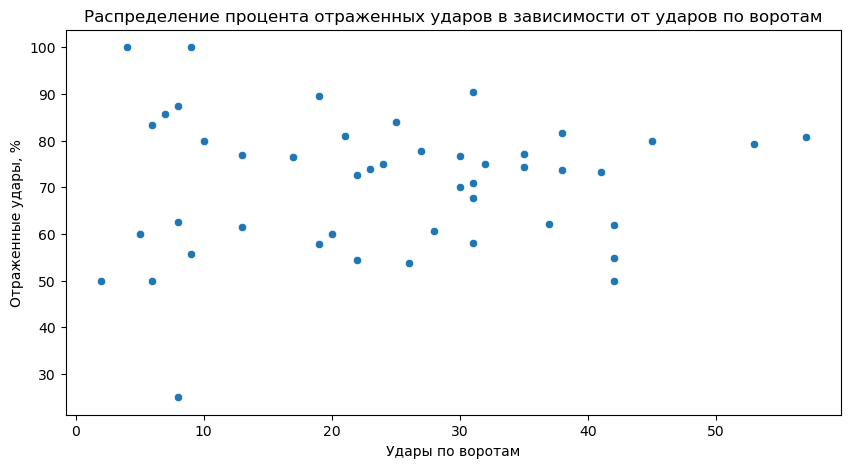

In [13]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=result_goalkeepers, x='SoTA', y='Save%')
plt.title('Распределение процента отраженных ударов в зависимости от ударов по воротам')
plt.xlabel('Удары по воротам')
plt.ylabel('Отраженные удары, %')
plt.show()

Видим, что количество ударов не влияет на процент отраженных ударов. Значит, дело в мастерстве голкиперов

**Посмотрим на распределение процента отраженных ударов в зависимости от возраста голкипера**

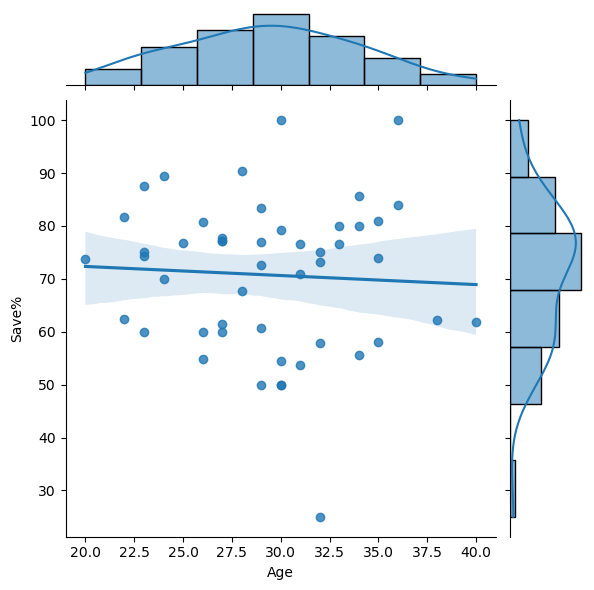

In [14]:
sns.jointplot(data=result_goalkeepers, x='Age', y='Save%', kind='reg')
plt.xlabel('Возраст')
plt.show()

Видим, что возраст голкипера заметно не влияет на успешность его игры

**Определим лучшего голкипера**

Прежде всего удалим из данных голкиперов, которые провели меньше 5 матчей (среднее значение)

In [15]:
result_goalkeepers = result_goalkeepers[result_goalkeepers['MP']>5]
print(f'Более 5 матчей провели {len(result_goalkeepers)} голкипера')

Более 5 матчей провели 22 голкипера


Ключевой показатель - это процент отраженных ударов. Выведем топ-10 по этому показателю

In [16]:
top_10_goalkepeers = result_goalkeepers.sort_values('Save%', ascending=False).head(10)
top_10_goalkepeers

,Player,Nationality,Position,Club,Age,Born,90s,GA,PKA,FK,...,Save%,W,D,L,CS,CS%,PKatt,PKsv,PKm,Save%.1
10,Ederson,BRA,GK,Manchester City,28,1993,11.0,4,1,0,...,90.3,7,4,0,7,63.6,1,0,0,0.0
6,Diogo Costa,POR,GK,Porto,22,1999,8.0,8,1,0,...,81.6,4,1,3,4,50.0,4,3,0,75.0
33,André Onana,CMR,GK,Inter,26,1996,13.0,11,0,0,...,80.7,7,3,3,8,61.5,0,0,0,NaN
30,Simon Mignolet,BEL,GK,Club Brugge,34,1988,8.0,11,2,0,...,80.0,3,2,3,5,62.5,3,0,1,0.0
7,Thibaut Courtois,BEL,GK,Real Madrid,30,1992,10.0,11,0,1,...,79.2,7,1,2,5,50.0,1,1,0,100.0
24,Mike Maignan,FRA,GK,Milan,27,1995,7.0,6,0,0,...,77.8,2,3,2,2,28.6,1,1,0,100.0
20,Dominik Livaković,CRO,GK,Dinamo Zagreb,27,1995,6.0,11,3,0,...,77.1,1,1,4,1,16.7,3,0,0,0.0
2,Kepa Arrizabalaga,ESP,GK,Chelsea,27,1994,9.0,8,0,0,...,77.1,4,1,4,3,33.3,0,0,0,NaN
28,Alex Meret,ITA,GK,Napoli,25,1997,10.0,8,1,0,...,76.7,7,1,2,4,40.0,2,1,0,50.0
16,Lukáš Hrádecký,FIN,GK,Leverkusen,32,1989,6.0,8,2,0,...,75.0,1,2,3,2,33.3,3,1,0,33.3


In [17]:
top_10_goalkepeers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 10 to 16
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       10 non-null     object 
 1   Nationality  10 non-null     object 
 2   Position     10 non-null     object 
 3   Club         10 non-null     object 
 4   Age          10 non-null     int64  
 5   Born         10 non-null     int64  
 6   90s          10 non-null     float64
 7   GA           10 non-null     int64  
 8   PKA          10 non-null     int64  
 9   FK           10 non-null     int64  
 10  CK           10 non-null     int64  
 11  OG           10 non-null     int64  
 12  PSxG         10 non-null     float64
 13  PSxG/SoT     10 non-null     float64
 14  PSxG+/-      10 non-null     float64
 15  /90          10 non-null     float64
 16  Cmp          10 non-null     int64  
 17  Att          10 non-null     int64  
 18  Cmp%         10 non-null     float64
 19  Att.1    

Для дальнейшего анализа выделим наиболее важные для анализа признаки:
- MP - сыгранные матчи
- GA - пропущенные голы
- SoTA - удары по повротам
- Save% - процент отраженных ударов
- PSxG+/- - От какого количества голов голкипер спас команду

In [18]:
cols = ['Player', 'MP', 'GA', 'SoTA', 'Save%', 'PSxG+/-']
top_10_goalkepeers[cols]

,Player,MP,GA,SoTA,Save%,PSxG+/-
10,Ederson,11,4,31,90.3,2.5
6,Diogo Costa,8,8,38,81.6,3.7
33,André Onana,13,11,57,80.7,7.6
30,Simon Mignolet,8,11,45,80.0,4.1
7,Thibaut Courtois,10,11,53,79.2,5.5
24,Mike Maignan,7,6,27,77.8,1.5
20,Dominik Livaković,6,11,35,77.1,2.5
2,Kepa Arrizabalaga,9,8,35,77.1,1.6
28,Alex Meret,10,8,30,76.7,3.4
16,Lukáš Hrádecký,6,8,24,75.0,-1.0


Выбор лучшего голкипера зависит от ключевой метрики, которая имеет наибольшую важность для исследователя. Со своей стороны выделю топ-3 голкиперов, которые достойно показали себя по всем показателям:<br>
- Ederson (лучший показатель по проценту отраженных ударов)
- André Onana (лучший показатель по спасению от ожидаемых голов)
- Thibaut Courtois (топ-2 по спасению от ожидаемых голов и достойный процент отраженных ударов)

### Защитные действия
<a id='defensive'></a>

In [19]:
defensive = pd.read_csv('ucl defensive actions.csv')
defensive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Player                               727 non-null    object 
 1   Nationality                          727 non-null    object 
 2   Position                             727 non-null    object 
 3   Club                                 727 non-null    object 
 4   Age                                  727 non-null    int64  
 5   Born                                 727 non-null    int64  
 6   90s                                  727 non-null    float64
 7   No. of players tackled               727 non-null    int64  
 8   Tackles won                          727 non-null    int64  
 9   Tackles (Def 3rd)                    727 non-null    int64  
 10  Tackles (Mid 3rd)                    727 non-null    int64  
 11  Tackles (Att 3rd)               

В одном столбце есть пропуски, в остальном данные в порядке

**Заполним пропуски**

Пропуск в столбце *% of dribblers successfully tackled* появляется из-за того, что показателя высчитывается как отношение удачных отборов на число попыток. Если число попыток равно нулю, то столбец содержит пропуск. Заполним столбец *% of dribblers successfully tackled* нулями

In [20]:
defensive['% of dribblers successfully tackled'] = defensive['% of dribblers successfully tackled'].fillna(0) 
defensive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Player                               727 non-null    object 
 1   Nationality                          727 non-null    object 
 2   Position                             727 non-null    object 
 3   Club                                 727 non-null    object 
 4   Age                                  727 non-null    int64  
 5   Born                                 727 non-null    int64  
 6   90s                                  727 non-null    float64
 7   No. of players tackled               727 non-null    int64  
 8   Tackles won                          727 non-null    int64  
 9   Tackles (Def 3rd)                    727 non-null    int64  
 10  Tackles (Mid 3rd)                    727 non-null    int64  
 11  Tackles (Att 3rd)               

В данных пропусков больше нет. Перейдем к исследованию данных

**Посмотрим, какие позиции указаны у игроков**

In [21]:
defensive['Position'].value_counts()

DF       226
MF       172
FW       110
FW,MF     62
GK        49
MF,FW     45
DF,MF     33
DF,FW     10
MF,DF     10
FW,DF     10
Name: Position, dtype: int64

Больше всего игроков на позиции DF (защитник), MF (полузащитник) и FW (форвард, нападающий). Так же имеем голкиперов, но их мы проанализировали ранее, поэтому удалим их из данных

In [22]:
defensive = defensive[defensive['Position']!='GK']

**Выясним, какие клубы имеют лучших оборонительных игроков**

Сгруппируем игроков по клубам и посчитаем суммарное число отборов и перехватов

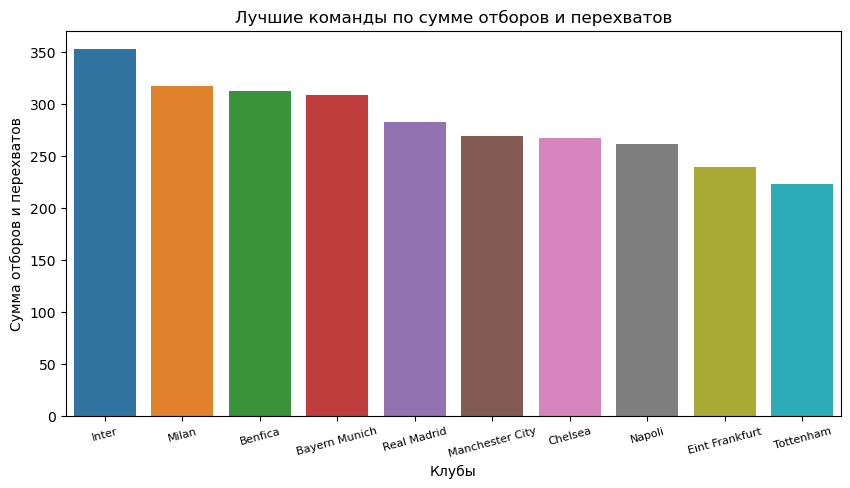

In [23]:
pivot = defensive.groupby(by='Club', as_index = False)['Tackles + internceptions'].sum().sort_values('Tackles + internceptions', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=pivot.head(10), x='Club', y='Tackles + internceptions')
plt.title('Лучшие команды по сумме отборов и перехватов')
plt.xlabel('Клубы')
plt.ylabel('Сумма отборов и перехватов')
plt.xticks(rotation=15, fontsize=8)
plt.show()

Итальянские команды умеют бороться на поле! *Inter* и *Milan* лучшие по сумме отборов и перехватов. Однако стоит учитывать, что какие-то команды провели меньше матчей, чем другие. Например, *Benfica* и *Bayern* провели на 3 матча меньше, чем *Manchester City*, но по числу отборов и перехватов опережают их

**Выясним, какие клубы имеют больше успешных оборонительных действий за матч**

В сводную возьмем информацию о проведенных матчах и удачных отборах и перехватах

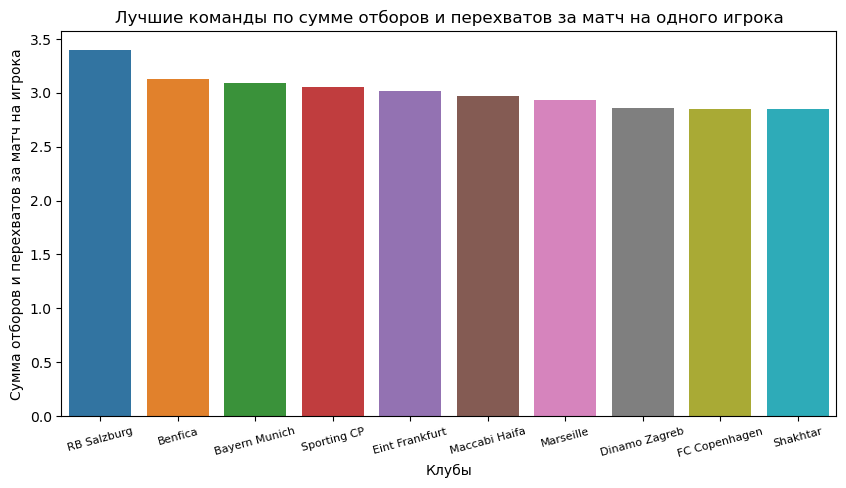

In [24]:
pivot = pd.pivot_table(data=defensive, index='Club', values=['90s', 'Tackles + internceptions'], aggfunc={'90s' : sum,
                                                                'Tackles + internceptions' : sum}).reset_index()
pivot['Tkl + Int per 90s'] = pivot['Tackles + internceptions'] / pivot['90s']
pivot.sort_values('Tkl + Int per 90s', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(data=pivot.sort_values('Tkl + Int per 90s', ascending=False).head(10), x='Club', y='Tkl + Int per 90s')
plt.title('Лучшие команды по сумме отборов и перехватов за матч на одного игрока')
plt.xlabel('Клубы')
plt.ylabel('Сумма отборов и перехватов за матч на игрока')
plt.xticks(rotation=15, fontsize=8)
plt.show()

*Inter* и *Milan* уже не в топ-10! По числу отборов за матч на игрока лидируют *Salzburg* и *Benfica*

**Посмотрим, влияет ли возраст игрока на успешную игру в обороне**

Для сравнения будем использовать метрику *% of dribblers successfully tackled*, которая показывает процент успешных отборов

Создадим сводную таблицу

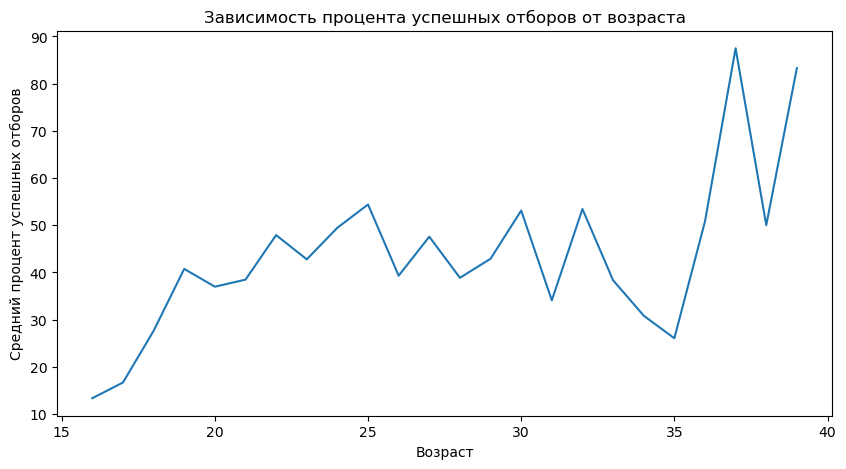

In [25]:
pivot = pd.pivot_table(data=defensive, index=['Age'] , values='% of dribblers successfully tackled', aggfunc='mean').reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=pivot, x='Age', y='% of dribblers successfully tackled')
plt.title('Зависимость процента успешных отборов от возраста')
plt.xlabel('Возраст')
plt.ylabel('Средний процент успешных отборов')
plt.show()

Видим, что игроки до 20 лет имеют меньший процент успешных отборов, а вот игрокам старше 36 уже помогает опыт, единоборства выиграть у них все сложнее

**Выберем лучших оборонительных игроков этого сезона Лиги Чемпионов**

Приоритетные показатели:<br>
- *90s* - сыгранные матчи
- *% of dribblers successfully tackled* - процент успешных отборов
- *Tackles + internceptions* - отборы и перехваты

Выделим ключевые показатели, также добавим столбец, показывающий отборы и перехваты за один матч

In [26]:
defensive_top = defensive.loc[:, ['Player', 'Nationality', 'Position', 'Club', 'Age', '90s', '% of dribblers successfully tackled',
                        'Tackles + internceptions']]
defensive_top['Tkl + Int per 90s'] = defensive_top['Tackles + internceptions'] / defensive_top['90s']
len(defensive_top)

678

Имеем 678 претендентов. Посмотрим, сколько в среденем матчей провели игроки

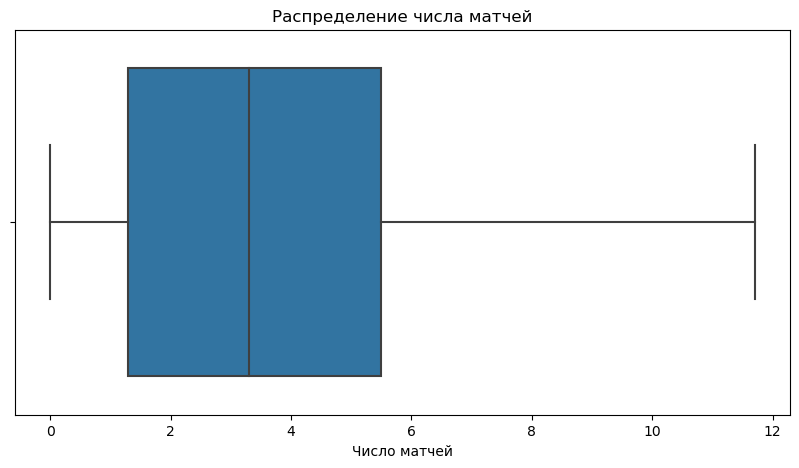

In [27]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=defensive_top, x='90s')
plt.title('Распределение числа матчей')
plt.xlabel('Число матчей')
plt.show()

Удалим из данных тех, кто провел меньше 6 матчей

In [28]:
defensive_top = defensive_top[defensive_top['90s']>= 6]
print(f'Осталось {len(defensive_top)} игрока, которые провели больше 6 матчей')

Осталось 135 игрока, которые провели больше 6 матчей


Посмотрим, сколько в среднем игроки совершали отборов и перехватов за матч

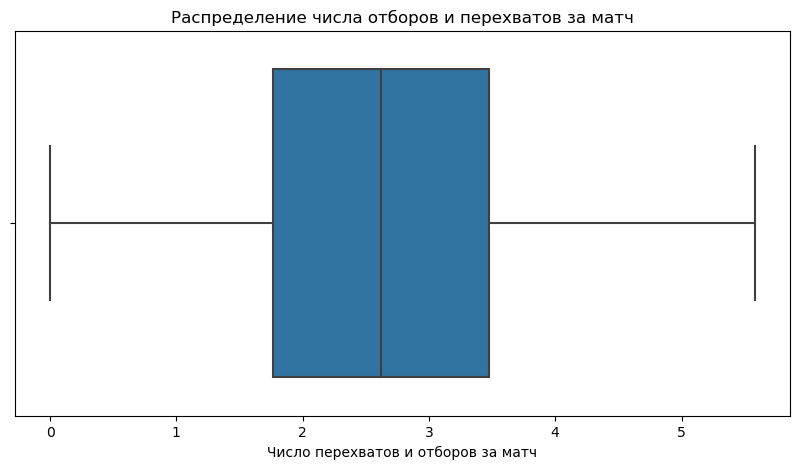

In [29]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=defensive_top, x='Tkl + Int per 90s')
plt.title('Распределение числа отборов и перехватов за матч')
plt.xlabel('Число перехватов и отборов за матч')
plt.show()

Оставим тех, кто делал не менее 4 отборов и перехватов за матч

In [30]:
defensive_top = defensive_top[defensive_top['Tkl + Int per 90s'] >= 4]
print(f'Осталось {len(defensive_top)} игроков, которые перехватывали мяч не менее 4 раз за матч')

Осталось 16 игроков, которые перехватывали мяч не менее 4 раз за матч


Отсортируем игроков по показателю *% of dribblers successfully tackled* - процент успешных отборов и выделим тех футболистов, у которых этот процент более 50%

In [31]:
defensive_top[defensive_top['% of dribblers successfully tackled'] > 50].sort_values('% of dribblers successfully tackled', 
                                                                                     ascending=False)

,Player,Nationality,Position,Club,Age,90s,% of dribblers successfully tackled,Tackles + internceptions,Tkl + Int per 90s
160,Amar Dedić,BIH,DF,RB Salzburg,19,6.0,83.3,28,4.666667
102,Emre Can,GER,MF,Dortmund,28,6.3,63.6,29,4.603175
152,Alphonso Davies,CAN,DF,Bayern Munich,21,6.7,60.0,30,4.477612
602,Nicolas Seiwald,AUT,MF,RB Salzburg,21,6.0,60.0,27,4.500000
625,Djibril Sow,SUI,MF,Eint Frankfurt,25,8.0,58.3,32,4.000000


Вот они топ-5 игроков этого сезона ЛЧ по оборонительным действиям

### Обостряющие действия
<a id='shot'></a>

Загрузим датасет и посмотрим на него

In [32]:
goal_and_shot = pd.read_csv('ucl goal and shot creation.csv')
goal_and_shot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player          727 non-null    object 
 1   Nationality     727 non-null    object 
 2   Position        727 non-null    object 
 3   Club            727 non-null    object 
 4   Age             727 non-null    int64  
 5   Born            727 non-null    int64  
 6   90s             727 non-null    float64
 7   SCA             727 non-null    int64  
 8   SCA/90          727 non-null    float64
 9   SCA (PassLive)  727 non-null    int64  
 10  SCA (PassDead)  727 non-null    int64  
 11  SCA (TO)        727 non-null    int64  
 12  SCA(Sh)         727 non-null    int64  
 13  SCA(Fld)        727 non-null    int64  
 14  SCA(Def)        727 non-null    int64  
 15  GCA             727 non-null    int64  
 16  GCA/90          727 non-null    float64
 17  GCA (PassLive)  727 non-null    int

Для анализа помимо информации об игркое нам будет достаточно всего 3 признаков:<br>
- *90s* - сыгранные матчи
- *SCA (Shot-Creating Actions)* - любые действие, которые способствуют тому, что команда наносит удар по воротам.
- *GCA (Goal-Creating Actions)* - любые действия, приведшие к голу.

Выделим нужные нам столбцы и удалим остальные

In [33]:
cols = goal_and_shot.columns.tolist()

good_cols = cols[:5] + cols[6:8] + [cols[15]]
good_cols

['Player', 'Nationality', 'Position', 'Club', 'Age', '90s', 'SCA', 'GCA']

In [34]:
goal_and_shot = goal_and_shot[good_cols]
goal_and_shot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       727 non-null    object 
 1   Nationality  727 non-null    object 
 2   Position     727 non-null    object 
 3   Club         727 non-null    object 
 4   Age          727 non-null    int64  
 5   90s          727 non-null    float64
 6   SCA          727 non-null    int64  
 7   GCA          727 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 45.6+ KB


**Найдем лучших игроков по показателю *GCA***

In [35]:
goal_and_shot.sort_values('GCA', ascending=False).head()

,Player,Nationality,Position,Club,Age,90s,SCA,GCA
610,Rafa Silva,POR,MF,Benfica,29,9.1,48,10
422,Kylian Mbappé,FRA,FW,Paris S-G,23,7.2,28,8
364,Khvicha Kvaratskhelia,GEO,FW,Napoli,21,7.7,44,8
317,Vinicius Júnior,BRA,FW,Real Madrid,22,10.8,53,8
569,Rodrygo,BRA,FW,Real Madrid,21,9.1,32,8


*Rafa Silva* совершил больше всех действий, которые привели к голу

**Найдем лучших игроков по показателю *SCA***

In [36]:
goal_and_shot.sort_values('SCA', ascending=False).head()

,Player,Nationality,Position,Club,Age,90s,SCA,GCA
251,Jack Grealish,ENG,FW,Manchester City,26,10.4,55,6
317,Vinicius Júnior,BRA,FW,Real Madrid,22,10.8,53,8
610,Rafa Silva,POR,MF,Benfica,29,9.1,48,10
364,Khvicha Kvaratskhelia,GEO,FW,Napoli,21,7.7,44,8
690,Federico Valverde,URU,"MF,FW",Real Madrid,24,10.7,43,6


По действиям, которые привели к удару по воротам, первое место занимает *Jack Grealish*. Примечательно, что *Rafa Silva* входит в топ-3 и по этому показателю!

**Вычислим самые обострающие игру позиции на поле**

Построим круговую диаграмму, которая будет показывать, какую долю от всех обостряющих действий, совершила та или иная команда

Первым делом, сгруппируем данные по командам и суммарные *SCA* на команду и *90s*

In [72]:
pivot = pd.pivot_table(data=goal_and_shot, index='Position', values='SCA', aggfunc=sum).reset_index()

Построим круговую диаграмму

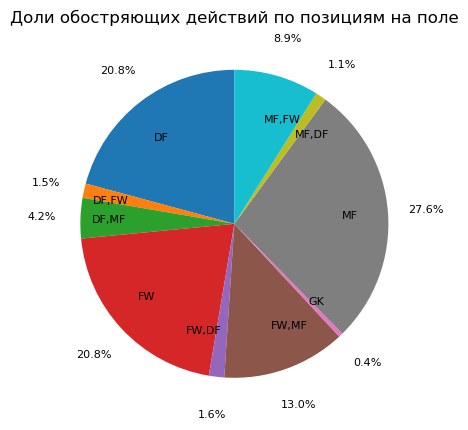

In [73]:
mpl.rcParams['font.size'] = 8

labels=pivot['Position'].unique()
sizes=pivot['SCA']

fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.set_title('Доли обостряющих действий по позициям на поле', fontsize=12)
ax.pie(sizes, labels=labels, autopct='%1.1f%%', pctdistance=1.25, labeldistance=0.7, startangle=90)
plt.show()

Ярко выраженные полузащитники и нападающие (как неожиданно!) создали больше всего моментов, котоыре привели к ударам по воротам

### Вывод
<a id='conclusion'></a>

Нам были даны датасеты, содержащие информацию о Лиге Чемпионов 2022-2023, а точнее, о действиях голкиперов, защитников и обостряющих действиях игроков команд. На каждом этапе мы **считывали данные**, проводили **предобработку** и **исследовательский анализ**, который включал построение сводных таблиц и разнообразных графиков. На протяжении всего анализа мы формулировали **выводы** по каждому датасету. **Например:**
- **Голкиперы**
    - *Andre Onana* рекордсмен по количеству сыгранных матчей в Лиге Чемпионов 2022-2023 среди голкиперов
    - Увидели, что возраст голкипера заметно не влияет на успешность его игры
- **Защитные действия**
    - По числу отборов за матч на игрока лидируют *Salzburg* и *Benfica*
    - В среднем игроки совершали около 2,7 отборов и перехватов за один матч
- **Атакующие действия**
    - *Rafa Silva* из *Benfica* совершил больше всех действий, которые привели к голам
    - По действиям, которые привели к удару по воротам, первое место занимает *Jack Grealish*